IMPORT LIBRARIES

In [28]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
!pip install -q scikit-plot
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import os
import seaborn as sns
from sklearn.linear_model import SGDClassifier

In [29]:
data = pd.read_csv('UCI_Credit_Card.csv')

In [30]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [31]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


PREPROCESS DATA : SCALE AND SPLIT THE DATA

In [32]:
#Scaling the data (normalising)
scaler = StandardScaler(with_mean=False)

In [33]:
#getting the target values
target_true = data['default.payment.next.month']

In [34]:
#Removing target from X data
data_df = data.loc[:, data.columns != 'default.payment.next.month']

In [35]:
#Removing IDs
data_df = data_df.loc[:, data_df.columns != 'ID']

In [36]:
#scaling
data_df = scaler.fit_transform(data_df)

#If we want to apply PCA
from sklearn.decomposition import PCA

def applyPCA(df,thershold1):
    '''
    this function takes a df(dataset), thershold(how much information is to be retain) and color of graph as a input
    '''

    '''Now calling the PCA method'''
    pca = PCA()
    pca.fit(df)


    '''Calculating the number of componenets given the thershold (required information retain)'''
    def CalCulateNumberOfComponent(eigen_values,thershold):
        sum_of_all_eigen_value = sum(eigen_values)
        for i in range(1, len(eigen_values)+1):
            if((sum(eigen_values[:i])/sum_of_all_eigen_value) >= thershold):
                return i


    EigenValues = pca.explained_variance_
    K = CalCulateNumberOfComponent(EigenValues,thershold1)
    return [K, thershold1]

applyPCA(data_df, 0.95)
pca = PCA(n_components=15)
pca.fit(data_df)
data_df = pca.transform(data_df)

In [37]:
#Splitting the dataset
X_tr, X_test, y_tr, y_test = train_test_split(data_df,target_true.values,test_size=0.3)

1) LOGISTIC REGRESSION : 

In [38]:
#Logistic regression classifier
def logis(Xtrain,ytrain,reg):
#Giving C parameters
  C_parameters = [{'C': [10**-4,10**-3,10**-2,10**-1, 10**0,10**1,10**2,10**3,10**4]}]
  C_values = [10**-4,10**-3,10**-2,10**-1, 10**0,10**1,10**2,10**3,10**4]
  
#Using GridSearchCV
  validation_score = []
  train_score = []
  model = GridSearchCV(LogisticRegression(penalty=reg), C_parameters, scoring = 'roc_auc',n_jobs=4, cv=2,return_train_score ='true')
  model.fit(Xtrain, ytrain)
#Train and test results are in model.cv_results_  
  regression = model.cv_results_
  validation_score = regression['mean_test_score']
  train_score = regression['mean_train_score']
# Changing c values to log for plotting  
  C_values_log = np.log(C_values)
  C_values_log.reshape(1,9)
#Get best estimator according to Gridsearchcv
  print(model.best_estimator_)
# Calculating best  c from train and test data by converting the array to list  
  validation_score = validation_score.tolist()
  train_score = train_score.tolist()
  optimal_c_cv = C_values[validation_score.index(max(validation_score))]
  optimal_c_tr = C_values[train_score.index(max(train_score))]
  log_tr = np.log(optimal_c_tr)
  log_cv = np.log(optimal_c_cv)
  optimal_c = float(np.exp((log_tr+log_cv)/2))
#plotting the curve  
  plt.figure()
  plt.title("AUC vs C")
  plt.plot(C_values_log,train_score,'b',label='Train AUC')
  plt.plot(C_values_log,validation_score,'darkorange',label='Validation AUC')
  plt.xlabel('C Value in natural log')
  plt.ylabel('Area Under ROC Curve')
  plt.gca().legend()
  plt.show()
  print('\nThe optimal c for training data is %f and ROC is %f.' % (optimal_c_tr,max(train_score)))
  print('\nThe optimal c for validation data is %f and ROC is %f.' % (optimal_c_cv,max(validation_score)))
  print('\nThe calculated optimal c for model is %f.' % optimal_c)
 
  return optimal_c


In [39]:
#Applying LR with optimal c
def lr_optimal(optimal_c,reg,Xtrain,Xtest):
  #for ROC Curve on train data
  clf = LogisticRegression(C=optimal_c, penalty=reg)
  clf.fit(Xtrain, y_tr)
  pred_train = clf.predict(Xtrain)
  #for ROC Curve on test data
  pred_test = clf.predict(Xtest)
  #Getting FPR AND TPR values for ROC Curve for train and test data
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  fpr,tpr,_ = roc_curve(y_tr,pred_train)
  roc_auc_train = roc_auc_score(y_tr,pred_train)
  
  fpr2 = dict()
  tpr2 = dict()
  roc_auc2 = dict()
  fpr2,tpr2,_ = roc_curve(y_test,pred_test)
  roc_auc_test = roc_auc_score(y_test,pred_test)
  
  plt.figure()
  plt.title(" ROC Curve")
  plt.plot(fpr,tpr,'b',label='ROC curve for train data(area = %0.2f)' % roc_auc_train)
  plt.plot(fpr2,tpr2,'r',label='ROC curve for test data(area = %0.2f)' % roc_auc_test)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()
  
  print("Confusion Matrix for Train data")
  skplt.metrics.plot_confusion_matrix(y_tr,pred_train)
  print(classification_report(y_tr ,pred_train))
  print("="*50)
  print("Confusion matrix for Test data")
  skplt.metrics.plot_confusion_matrix(y_test,pred_test)
  print(classification_report(y_test ,pred_test))
  #for sparcity check
  w = clf.coef_
  
  return w  

  

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


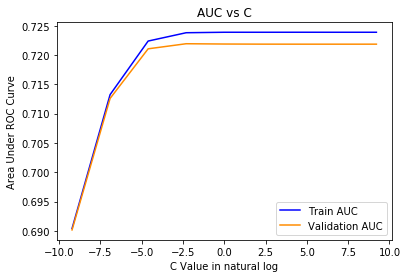


The optimal c for training data is 100.000000 and ROC is 0.723877.

The optimal c for validation data is 0.100000 and ROC is 0.721919.

The calculated optimal c for model is 3.162278.


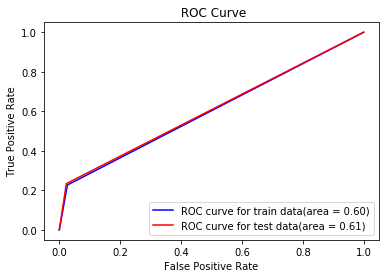

Confusion Matrix for Train data
             precision    recall  f1-score   support

          0       0.82      0.97      0.89     16352
          1       0.71      0.23      0.34      4648

avg / total       0.79      0.81      0.77     21000

Confusion matrix for Test data
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      7012
          1       0.74      0.23      0.36      1988

avg / total       0.80      0.81      0.77      9000



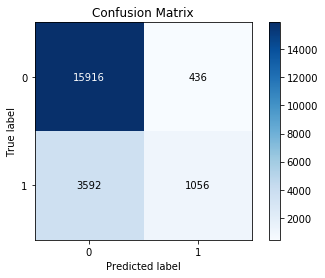

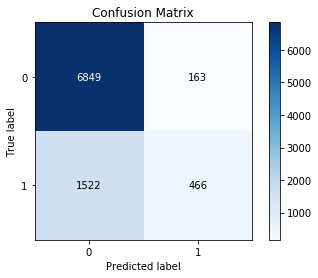

In [40]:
#Calulating optimal c by comparing auc of train and cv data
optimal_c = logis(X_tr,y_tr,'l2')
#applying LR using optimal c and plotting ROC curve and confusion matrix
w = lr_optimal(optimal_c,'l2',X_tr,X_test)


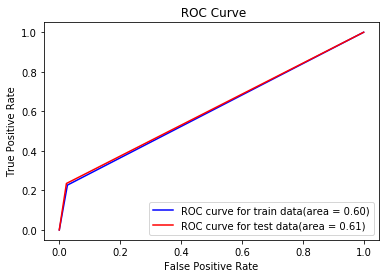

Confusion Matrix for Train data
             precision    recall  f1-score   support

          0       0.82      0.97      0.89     16352
          1       0.71      0.23      0.34      4648

avg / total       0.79      0.81      0.77     21000

Confusion matrix for Test data
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      7012
          1       0.74      0.23      0.36      1988

avg / total       0.80      0.81      0.77      9000



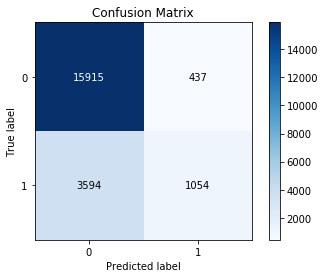

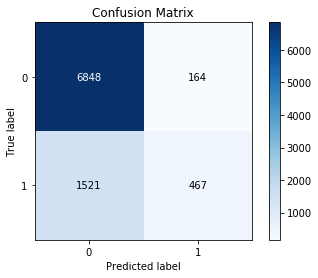

In [41]:
#performing LR again by decreasing c for same set .Take c = 0.1.
#applying LR using optimal c and plotting ROC curve and confusion matrix
w = lr_optimal(0.1,'l2',X_tr,X_test)

2) SVM : 

In [42]:
#SVM
def hypertuning(traindata):

  kf = KFold(n_splits=5,random_state=3, shuffle=True)
  cv = []
  train = []
  alphas = [0.0001,0.001,0.01,0.1,1,10,100,10000]
  alphaslog = np.log(alphas)
  alphaslog.reshape(1,8)
  param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100,10000], 'penalty': ['l1']}
  hyper = (ParameterGrid(param_grid))
  #finding best hyperparameter
  for i in range(8):
    
    for train_index,test_index in kf.split(traindata):
      xxtrain, xxtest = traindata[train_index], traindata[test_index]
      yytrain, yytest = y_tr[train_index], y_tr[test_index]
      clf = SGDClassifier()
      clf.set_params = hyper[i]
      clf.fit(xxtrain,yytrain)
      model = CalibratedClassifierCV(clf,cv = 'prefit')
      model.fit(xxtrain,yytrain)
      trainscores = []
      cvscores = []
      trainvalues = model.predict_proba(xxtrain)
    
      trainscores.append(roc_auc_score(yytrain,trainvalues[:,1]))
      cvvalues =model.predict_proba(xxtest)
      cvscores.append(roc_auc_score(yytest,cvvalues[:,1]))

    train.append(np.mean(trainscores))
    cv.append(np.mean(cvscores))
    trainscores = []
    cvscores = []

  for i in range(8):
    param_grid = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100,10000], 'penalty': ['l2']}
    hyper = (ParameterGrid(param_grid))
    
    for train_index,test_index in kf.split(traindata):
      xxtrain, xxtest = traindata[train_index], traindata[test_index]
      yytrain, yytest = y_tr[train_index], y_tr[test_index]
      clf = SGDClassifier()
      clf.set_params = hyper[i]
      clf.fit(xxtrain,yytrain)
      model = CalibratedClassifierCV(clf,cv = 'prefit')
      model.fit(xxtrain,yytrain)
      trainscores = []
      cvscores = []
      trainvalues = model.predict_proba(xxtrain)
  
      trainscores.append(roc_auc_score(yytrain,trainvalues[:,1]))
      cvvalues =model.predict_proba(xxtest)
      cvscores.append(roc_auc_score(yytest,cvvalues[:,1]))

    train.append(np.mean(trainscores))
    cv.append(np.mean(cvscores))
    trainscores = []
    cvscores = []
  plt.figure()
  plt.plot(alphaslog,train[:8],'b',label='Train AUC with l1 reg')
  plt.plot(alphaslog,cv[:8],'r',label='CV AUC with l1 reg')
  plt.plot(alphaslog,train[8:16],'g',label='Train AUC with l2 reg')
  plt.plot(alphaslog,cv[8:16],'darkorange',label='CV AUC with l2 reg')
  plt.xlabel('alpha Value in natural log')
  plt.ylabel('Area Under ROC Curve')
  plt.gca().legend()
  plt.show()
   # determining alpha and reg by considering max cv
  cvl1 = np.mean(cv[0:8])
  cvl2 = np.mean(cv[8:16])
  if cvl1>cvl2:
    alphatrain = alphas[train[0:8].index(max(train[0:8]))]
    alphacv = alphas[cv[0:8].index(max(cv[0:8]))]
    reg = 'l1'
    optimal_alpha = np.median([alphacv,alphatrain])
  else:
    alphatrain = alphas[train[8:16].index(max(train[8:16]))]
    alphacv = alphas[cv[8:16].index(max(cv[8:16]))]
    reg = 'l2'
    optimal_alpha = np.median([alphacv,alphatrain])
    
  print('Optimal alpha is {} and reg is {}'.format(optimal_alpha,reg))

  return optimal_alpha,reg


In [43]:
#Applying SGD with optimal optimal alpha
def sgd_optimal(optimal_alpha,reg,Xtrain,Xtest):
  #training the data using optimal alpha and regularisation.
  model = SGDClassifier(alpha=optimal_alpha,penalty =reg)
  model.fit(Xtrain,y_tr)
  p_train = model.predict(Xtrain)
  p_test = model.predict(Xtest)
  clf = CalibratedClassifierCV(model,cv = 2)
  clf.fit(Xtrain,y_tr)
  pred_train = clf.predict_proba(Xtrain)
  pred_test = clf.predict_proba(Xtest)
  #Getting FPR AND TPR values for ROC Curve for train and test data
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  fpr,tpr,_ = roc_curve(y_tr,pred_train[:,1])
  roc_auc_train = roc_auc_score(y_tr,pred_train[:,1])
  
  fpr2 = dict()
  tpr2 = dict()
  roc_auc2 = dict()
  fpr2,tpr2,_ = roc_curve(y_test,pred_test[:,1])
  roc_auc_test = roc_auc_score(y_test,pred_test[:,1])
  
  plt.figure()
  plt.title(" ROC Curve")
  plt.plot(fpr,tpr,'b',label='ROC curve for train data(area = %0.2f)' % roc_auc_train)
  plt.plot(fpr2,tpr2,'r',label='ROC curve for test data(area = %0.2f)' % roc_auc_test)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()
  
  #for confusion matrix
  print("Confusion Matrix for Train data")
  skplt.metrics.plot_confusion_matrix(y_tr,p_train)
  print(classification_report(y_tr,p_train))
  print("="*50)
  print("Confusion matrix for Test data")
  skplt.metrics.plot_confusion_matrix(y_test,p_test)
  print(classification_report(y_test,p_test))
  #for sparcity check
  w = model.coef_
  
  return w  



3) USING RBF KERNEL for SVM:

In [44]:
#SVM with RBF Kernel
def svmtuning(Xtrain):
#Giving C parameters
  C_parameters = [{'C': [0.0001,0.001,0.01,0.1,1,10,100,10000]}]
  C_values = [0.0001,0.001,0.01,0.1,1,10,100,10000]
  
#Using GridSearchCV
  validation_score = []
  train_score = []
  model = GridSearchCV(SVC(gamma="auto",probability=True), C_parameters, scoring = 'roc_auc',n_jobs=4, cv=2,return_train_score ='true')
  model.fit(Xtrain, y_tr)
#Train and test results are in model.cv_results_  
  results = model.cv_results_
  validation_score = results['mean_test_score']
  train_score = results['mean_train_score']
# Changing c values to log for plotting  
  C_values_log = np.log(C_values)
  C_values_log.reshape(1,8)
#Get best estimator according to Gridsearchcv
  print(model.best_estimator_)
# Calculating best  c from train and test data by converting the array to list  
  validation_score = validation_score.tolist()
  train_score = train_score.tolist()
  optimal_c_cv = C_values[validation_score.index(max(validation_score))]
  optimal_c_tr = C_values[train_score.index(max(train_score))]
  log_tr = np.log(optimal_c_tr)
  log_cv = np.log(optimal_c_cv)
  optimal_c = float(np.exp((log_tr+log_cv)/2))
#plotting the curve  
  plt.figure()
  plt.title("AUC vs C")
  plt.plot(C_values_log,train_score,'b',label='Train AUC')
  plt.plot(C_values_log,validation_score,'darkorange',label='Validation AUC')
  plt.xlabel('C Value in natural log')
  plt.ylabel('Area Under ROC Curve')
  plt.gca().legend()
  plt.show()
  print('\nThe optimal c for training data is %f and ROC is %f.' % (optimal_c_tr,max(train_score)))
  print('\nThe optimal c for validation data is %f and ROC is %f.' % (optimal_c_cv,max(validation_score)))
  print('\nThe calculated optimal c for model is %f.' % optimal_c)
 
  return optimal_c


In [45]:
#Applying SVM with optimal c
def svm_optimal(optimal_c,Xtrain,Xtest):
  #for ROC Curve on train data
  clf = SVC(C=optimal_c, gamma="auto",probability=True)
  clf.fit(Xtrain, y_tr)
  pred_train = clf.predict_proba(Xtrain)
  #for ROC Curve on test data
  pred_test = clf.predict_proba(Xtest)
  #Getting FPR AND TPR values for ROC Curve for train and test data
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  fpr,tpr,_ = roc_curve(y_tr,pred_train[:,1])
  roc_auc_train = roc_auc_score(y_tr,pred_train[:,1])
  
  fpr2 = dict()
  tpr2 = dict()
  roc_auc2 = dict()
  fpr2,tpr2,_ = roc_curve(y_test,pred_test[:,1])
  roc_auc_test = roc_auc_score(y_test,pred_test[:,1])
  
  plt.figure()
  plt.title(" ROC Curve")
  plt.plot(fpr,tpr,'b',label='ROC curve for train data(area = %0.2f)' % roc_auc_train)
  plt.plot(fpr2,tpr2,'r',label='ROC curve for test data(area = %0.2f)' % roc_auc_test)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()
  #for confusion matrix
  pred_train = clf.predict(Xtrain)
  #for ROC Curve on test data
  pred_test = clf.predict(Xtest)
  print("Confusion Matrix for Train data")
  skplt.metrics.plot_confusion_matrix(y_tr,pred_train)
  print(classification_report(y_tr,pred_train))
  print("="*50)
  print("Confusion matrix for Test data")
  skplt.metrics.plot_confusion_matrix(y_test,pred_test)
  print(classification_report(y_test,pred_test))

  

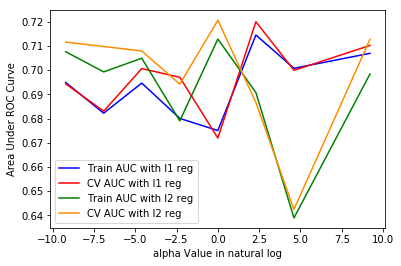

Optimal alpha is 1.0 and reg is l2


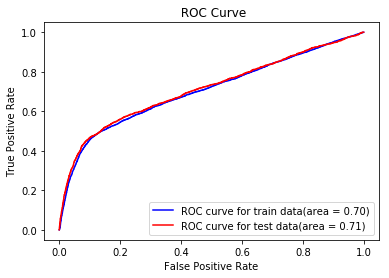

Confusion Matrix for Train data
             precision    recall  f1-score   support

          0       0.78      1.00      0.88     16352
          1       0.00      0.00      0.00      4648

avg / total       0.61      0.78      0.68     21000

Confusion matrix for Test data
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      7012
          1       0.00      0.00      0.00      1988

avg / total       0.61      0.78      0.68      9000



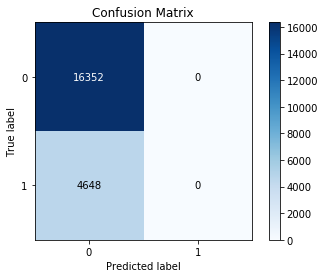

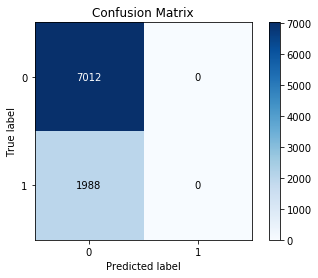

In [46]:
#APPLYING LINEAR SVM:
#getting alpha and regularisation
alpha,reg = hypertuning(X_tr)
#applying linear svm
w = sgd_optimal(alpha,reg,X_tr,X_test)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


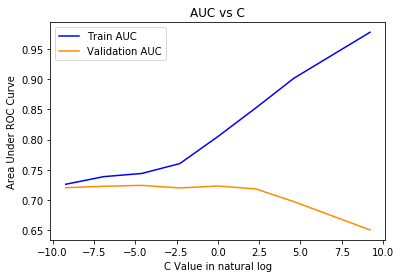


The optimal c for training data is 10000.000000 and ROC is 0.977933.

The optimal c for validation data is 0.010000 and ROC is 0.724097.

The calculated optimal c for model is 10.000000.


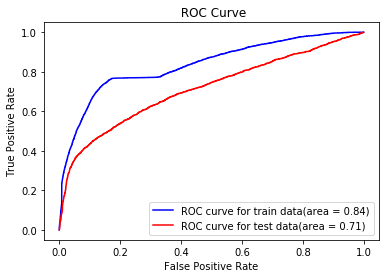

Confusion Matrix for Train data
             precision    recall  f1-score   support

          0       0.85      0.96      0.90     16352
          1       0.77      0.41      0.53      4648

avg / total       0.83      0.84      0.82     21000

Confusion matrix for Test data
             precision    recall  f1-score   support

          0       0.83      0.96      0.89      7012
          1       0.69      0.33      0.45      1988

avg / total       0.80      0.82      0.79      9000



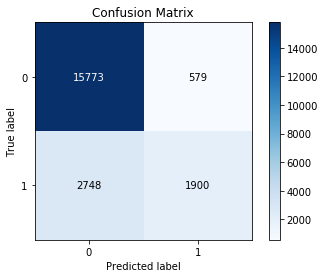

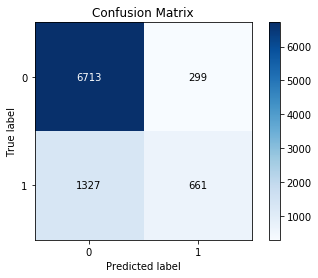

In [47]:
#RBF SVM
#Get optimal c
c = svmtuning(X_tr)
#Applying RBF SVM on data
svm_optimal(c,X_tr,X_test)

4)RANDOM FOREST ALGORITHM: 

In [48]:
#Random Forest
def rf(ft_train,ft_test):
  #Giving Parameters for tuning
  parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'n_estimators':[100, 500, 700, 1000]}
  rf = RandomForestClassifier(n_jobs=-1)
  clf = GridSearchCV(rf, param_grid = parameters, scoring='roc_auc', cv=2,return_train_score=True)
  clf.fit(ft_train,y_tr)

  results = clf.cv_results_
  train_score = results['mean_train_score']
  train_score_reshaped = train_score.reshape(7,4)
  test_score = results['mean_test_score']
  test_score_reshaped = test_score.reshape(7,4)
  max_depth=[1, 5, 10, 50, 100, 500, 1000]
  n_estimators=[100, 500, 700, 1000]


  #Making into a Dataframe for Heatmaps
  df_trainscore = pd.DataFrame(train_score_reshaped,columns=n_estimators,index=max_depth)
  df_testscore = pd.DataFrame(test_score_reshaped,columns=n_estimators,index=max_depth)

  #Getting Max Values
  train_max_value = df_trainscore.values.max()
  test_max_value = df_testscore.values.max()
  
  #Finding location of the max values (row,column)
  i1,j1=  np.where(df_trainscore.values == train_max_value)
  i2,j2 = np.where(df_testscore.values == test_max_value)
  max_depth_train = list(df_trainscore.index[i1])[0]
  n_est_train = list(df_trainscore.columns[j1])[0]
  max_depth_test = list(df_testscore.index[i2])[0]
  n_est_test = list(df_testscore.columns[j2])[0]
  
  
  #Calculating Optimal Values
  max_depth_optimal = int(np.median((max_depth_train,max_depth_test)))
  n_est_optimal = int(np.median((n_est_train,n_est_test)))
  
  #Plotting Heat Maps
  fig, (ax1, ax2) =plt.subplots(1,2)
  sns.heatmap(df_trainscore, annot = True, ax=ax1)
  sns.heatmap(df_testscore, annot = True, ax=ax2)
  ax1.set_title('Training plot')
  ax1.set_xlabel('n_estimators')
  ax1.set_ylabel('max_depth')
  ax2.set_title('Validation plot')
  ax2.set_xlabel('n_estimators')
  ax2.set_ylabel('max_depth')
  fig.show()


  print('The maximum Train AUC is {} for  {},{} . The max Validation AUC is {} for {},{}  '.format(train_max_value,max_depth_train,n_est_train,test_max_value,max_depth_test,n_est_test))
  print('Optimal parameters are max_depth = {} and n_estimators={} ' .format(max_depth_optimal,n_est_optimal))
  print("="*50)

  #Training model with optimal parameters
  model = RandomForestClassifier(max_depth=max_depth_optimal,n_estimators=n_est_optimal,n_jobs=-1)
  model.fit(ft_train,y_tr)
  pred_train = model.predict_proba(ft_train)
  pred_test = model.predict_proba(ft_test)
  p_train = model.predict(ft_train)
  p_test = model.predict(ft_test)
  f = model.feature_importances_
  
  #Getting FPR AND TPR values for ROC Curve for train and test data
  
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  fpr,tpr,_ = roc_curve(y_tr,pred_train[:,1])
  roc_auc_train = roc_auc_score(y_tr,pred_train[:,1])
  fpr2 = dict()
  tpr2 = dict()
  roc_auc2 = dict()
  fpr2,tpr2,_ = roc_curve(y_test,pred_test[:,1])
  roc_auc_test = roc_auc_score(y_test,pred_test[:,1])
  plt.figure()
  plt.title(" ROC Curve")
  plt.plot(fpr,tpr,'b',label='ROC curve for train data(area = %0.2f)' % roc_auc_train)
  plt.plot(fpr2,tpr2,'r',label='ROC curve for test data(area = %0.2f)' % roc_auc_test)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()
  #return max_depth_optimal,n_estimators_optimal
  print('This is the ROC_AUC curve using optimal parameters with ROC_AUC of %0.2f for test data' %roc_auc_test)
  print("="*50)

  #For confusion matrix
  print("Confusion Matrix for Train data")
  skplt.metrics.plot_confusion_matrix(y_tr,p_train)
  print(classification_report(y_tr,p_train))
  print("="*50)
  print("Confusion matrix for Test data")
  skplt.metrics.plot_confusion_matrix(y_test,p_test)
  print(classification_report(y_test,p_test))

  




The maximum Train AUC is 0.9999996710703594 for  1000,500 . The max Validation AUC is 0.7805993640132236 for 10,1000  
Optimal parameters are max_depth = 505 and n_estimators=750 


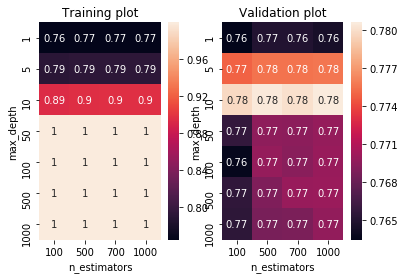

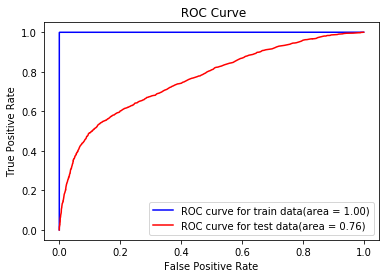

This is the ROC_AUC curve using optimal parameters with ROC_AUC of 0.76 for test data
Confusion Matrix for Train data
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     16352
          1       1.00      1.00      1.00      4648

avg / total       1.00      1.00      1.00     21000

Confusion matrix for Test data
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7012
          1       0.67      0.37      0.48      1988

avg / total       0.80      0.82      0.80      9000



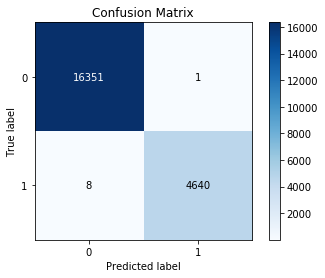

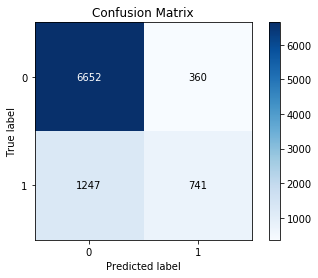

In [49]:
rf(X_tr,X_test)